How many times have each defending king been attacked and by whom

how many types of battles

battles/locations, region

kings vs defenses-done


frequency of battles/year-done

ranking battles as per 'attack vs defense strength '

defense kings vs attackers size

spread of battle location across regions

champions of war-attacker outcome,major death,major capture


In [367]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import  networkx as nx


In [368]:
battles = pd.read_csv('./battles.csv')
character_deaths = pd.read_csv('./character-deaths.csv')
character_predictions = pd.read_csv('./character-predictions.csv')


In [369]:
battles.columns #columns' name

Index(['name', 'year', 'battle_number', 'attacker_king', 'defender_king',
       'attacker_1', 'attacker_2', 'attacker_3', 'attacker_4', 'defender_1',
       'defender_2', 'defender_3', 'defender_4', 'attacker_outcome',
       'battle_type', 'major_death', 'major_capture', 'attacker_size',
       'defender_size', 'attacker_commander', 'defender_commander', 'summer',
       'location', 'region', 'note'],
      dtype='object')

In [370]:
battles.head(3)

,name,year,battle_number,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,...,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
0,Battle of the Golden Tooth,298,1,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,1.0,0.0,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance",1.0,Golden Tooth,The Westerlands,NaN
1,Battle at the Mummer's Ford,298,2,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Baratheon,...,1.0,0.0,NaN,120.0,Gregor Clegane,Beric Dondarrion,1.0,Mummer's Ford,The Riverlands,NaN
2,Battle of Riverrun,298,3,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,0.0,1.0,15000.0,10000.0,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",1.0,Riverrun,The Riverlands,NaN


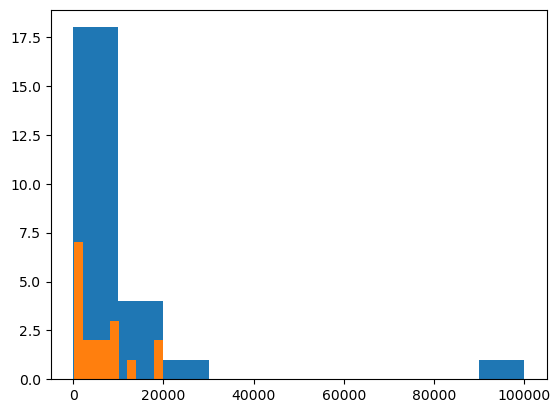

In [371]:
#todisplay the size of defend and attack for comparing with eachother
plt.hist(battles.attacker_size, bins=10);
plt.hist(battles.defender_size, bins=10);

In [372]:
battles.location.value_counts()

location
Riverrun                                3
Winterfell                              3
Storm's End                             2
Harrenhal                               2
Darry                                   2
Moat Cailin                             2
Deepwood Motte                          2
Torrhen's Square                        2
Golden Tooth                            1
Seagard                                 1
Castle Black                            1
Shield Islands                          1
Saltpans                                1
Ruby Ford                               1
Ryamsport, Vinetown, Starfish Harbor    1
Dragonstone                             1
The Twins                               1
Red Fork                                1
Duskendale                              1
King's Landing                          1
Crag                                    1
Mummer's Ford                           1
Oxcross                                 1
Stony Shore              

(array([ 3., 17.,  0., 10.,  0.,  3.,  2.,  0.,  1.,  2.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <BarContainer object of 10 artists>)

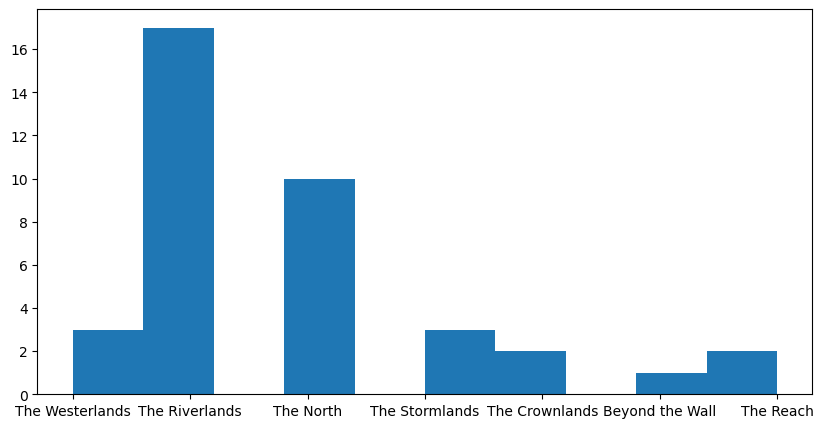

In [373]:
fig = plt.figure(figsize=(10, 5))
plt.hist(battles.region, )

<Axes: xlabel='count', ylabel='attacker_commander'>

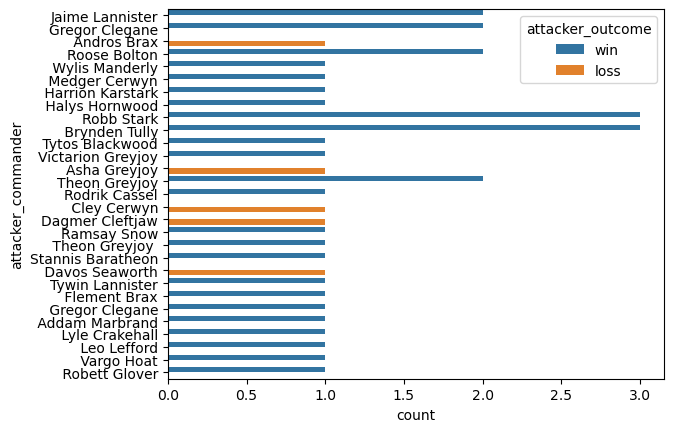

In [388]:
battles['attacker_commander'] = battles['attacker_commander'].str.split(',').explode('attacker_commander')
sns.countplot(y=battles['attacker_commander'], data= battles, hue='attacker_outcome')

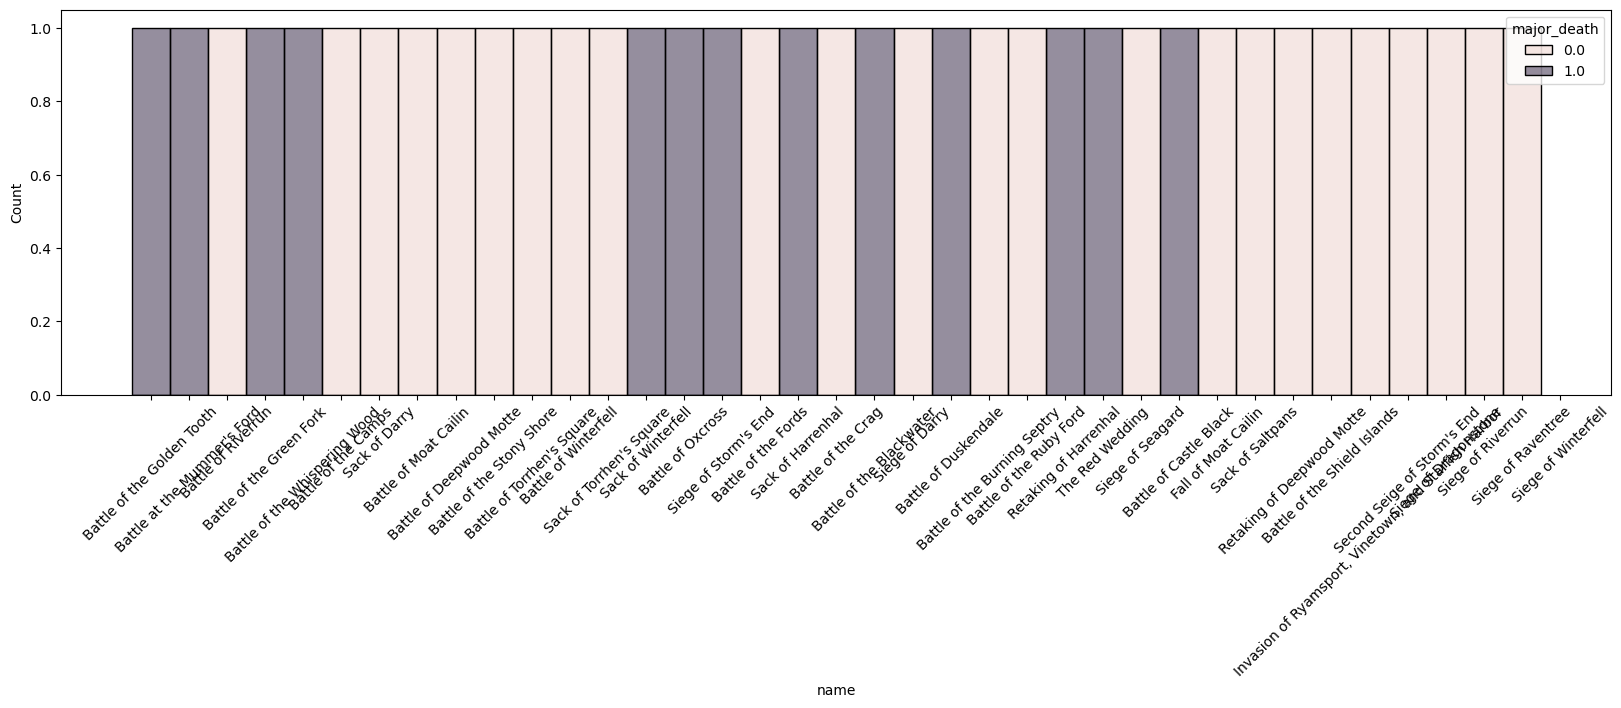

In [400]:
plt.figure(figsize=(20, 5))
sns.histplot(x= 'name', data= battles, hue='major_death');
plt.xticks(rotation=45);

In [336]:
attacked_counts = {}

for defender in battles.defender_king.unique():
    attacker_kings = battles.attacker_king[battles.defender_king==defender] 
    defending_time = 0
    attackers = {}
    for j , attacker in enumerate(attacker_kings):
            if attacker in attackers:
                defending_time += 1
                attackers[attacker] = defending_time
            else: 
                defending_time = 1
                attackers[attacker] = defending_time
    attacked_counts[defender] = attackers

for defender , attackers in attacked_counts.items():
    print(f'defender_king: {defender}')
    for attacker , count in attackers.items():
        print(f'attacked by: {attacker}, {count}')


defender_king: Robb Stark
attacked by: Joffrey/Tommen Baratheon, 10
attacked by: Balon/Euron Greyjoy, 4
defender_king: Joffrey/Tommen Baratheon
attacked by: Robb Stark, 4
attacked by: Stannis Baratheon, 3
attacked by: Balon/Euron Greyjoy, 2
defender_king: Balon/Euron Greyjoy
attacked by: Robb Stark, 1
attacked by: Balon/Euron Greyjoy, 1
attacked by: Joffrey/Tommen Baratheon, 1
attacked by: Stannis Baratheon, 1
defender_king: Renly Baratheon
attacked by: Stannis Baratheon, 1
defender_king: nan
defender_king: Mance Rayder
attacked by: Stannis Baratheon, 1
defender_king: Stannis Baratheon
attacked by: Joffrey/Tommen Baratheon, 2


In [337]:
df = pd.DataFrame.from_dict(attacked_counts, orient='index').fillna(0)
df

,Joffrey/Tommen Baratheon,Balon/Euron Greyjoy,Robb Stark,Stannis Baratheon
Robb Stark,10.0,4.0,0.0,0.0
Balon/Euron Greyjoy,1.0,1.0,1.0,1.0
Stannis Baratheon,2.0,0.0,0.0,0.0
Joffrey/Tommen Baratheon,0.0,2.0,4.0,3.0
Renly Baratheon,0.0,0.0,0.0,1.0
Mance Rayder,0.0,0.0,0.0,1.0


In [338]:
character_deaths.head()

,Name,Allegiances,Death Year,Book of Death,Death Chapter,Book Intro Chapter,Gender,Nobility,GoT,CoK,SoS,FfC,DwD
0,Addam Marbrand,Lannister,NaN,NaN,NaN,56.0,1,1,1,1,1,1,0
1,Aegon Frey (Jinglebell),NaN,299.0,3.0,51.0,49.0,1,1,0,0,1,0,0
2,Aegon Targaryen,House Targaryen,NaN,NaN,NaN,5.0,1,1,0,0,0,0,1
3,Adrack Humble,House Greyjoy,300.0,5.0,20.0,20.0,1,1,0,0,0,0,1
4,Aemon Costayne,Lannister,NaN,NaN,NaN,NaN,1,1,0,0,1,0,0


In [339]:
character_predictions.head()

,S.No,actual,pred,alive,plod,name,title,male,culture,dateOfBirth,...,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,boolDeadRelations,isPopular,popularity,isAlive
0,1,0,0,0.054,0.946,Viserys II Targaryen,NaN,1,NaN,NaN,...,0.0,NaN,0,0,NaN,11,1,1,0.605351,0
1,2,1,0,0.387,0.613,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,...,NaN,1.0,1,1,97.0,1,1,1,0.896321,1
2,3,1,0,0.493,0.507,Addison Hill,Ser,1,NaN,NaN,...,NaN,NaN,0,1,NaN,0,0,0,0.267559,1
3,4,0,0,0.076,0.924,Aemma Arryn,Queen,0,NaN,82.0,...,NaN,0.0,1,1,23.0,0,0,0,0.183946,0
4,5,1,1,0.617,0.383,Sylva Santagar,Greenstone,0,Dornish,276.0,...,NaN,1.0,1,1,29.0,0,0,0,0.043478,1


In [340]:
battles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                38 non-null     object 
 1   year                38 non-null     int64  
 2   battle_number       38 non-null     int64  
 3   attacker_king       36 non-null     object 
 4   defender_king       35 non-null     object 
 5   attacker_1          38 non-null     object 
 6   attacker_2          10 non-null     object 
 7   attacker_3          3 non-null      object 
 8   attacker_4          2 non-null      object 
 9   defender_1          37 non-null     object 
 10  defender_2          2 non-null      object 
 11  defender_3          0 non-null      float64
 12  defender_4          0 non-null      float64
 13  attacker_outcome    37 non-null     object 
 14  battle_type         37 non-null     object 
 15  major_death         37 non-null     float64
 16  major_capt

In [341]:
battles.columns

Index(['name', 'year', 'battle_number', 'attacker_king', 'defender_king',
       'attacker_1', 'attacker_2', 'attacker_3', 'attacker_4', 'defender_1',
       'defender_2', 'defender_3', 'defender_4', 'attacker_outcome',
       'battle_type', 'major_death', 'major_capture', 'attacker_size',
       'defender_size', 'attacker_commander', 'defender_commander', 'summer',
       'location', 'region', 'note'],
      dtype='object')

In [342]:
for col in battles.columns:
    print(col,battles[col].nunique())
# battles[col].unique(),          

name 38
year 3
battle_number 38
attacker_king 4
defender_king 6
attacker_1 11
attacker_2 7
attacker_3 2
attacker_4 1
defender_1 12
defender_2 2
defender_3 0
defender_4 0
attacker_outcome 2
battle_type 4
major_death 2
major_capture 2
attacker_size 19
defender_size 14
attacker_commander 31
defender_commander 28
summer 2
location 27
region 7
note 5


In [343]:
for col in battles.columns:
    print(col, battles[col].isna().sum())

name 0
year 0
battle_number 0
attacker_king 2
defender_king 3
attacker_1 0
attacker_2 28
attacker_3 35
attacker_4 36
defender_1 1
defender_2 36
defender_3 38
defender_4 38
attacker_outcome 1
battle_type 1
major_death 1
major_capture 1
attacker_size 14
defender_size 19
attacker_commander 1
defender_commander 10
summer 1
location 1
region 0
note 33


In [344]:
battles['attacker_king'].fillna(battles['attacker_king'].mode()[0], inplace=True)
battles['defender_king'].fillna(battles['defender_king'].mode()[0], inplace=True)

In [345]:
def kings(data):
    kings = []
    for king in data.attacker_king:
        if king not in kings:
            kings.append(king)
    for king in data.defender_king:
        if king not in kings:
            kings.append(king)
    return kings


<BarContainer object of 38 artists>

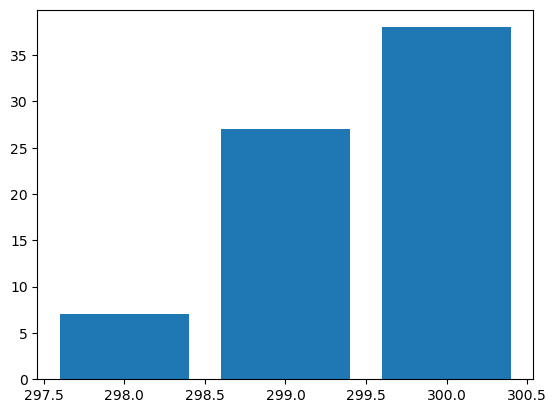

In [346]:
plt.bar(battles.year, battles.battle_number)

In [107]:
edges = list(zip(attackers, defender))

In [108]:
G = nx.DiGraph()
G.add_nodes_from(kings(battles))
G.add_edges_from(edges)

In [304]:
def weight(data, graph, attacked_counts):
    for _, row in data.iterrows():
        attacker = row.attacker_king
        defender = row.defender_king
        weight_node = 0
        weight_edge = 0
                    
        if not pd.isna(row.major_death):
            weight_edge += row.major_death
            # Add weight based on army sizes
        if not pd.isna(row.attacker_size):
            weight_edge += (row.attacker_size) * 0.02  # scale down for visualization purposes
        if not pd.isna(row.defender_size):
            weight_edge += (row.defender_size) * 0.02  # scale down for visualization purposes
    
    # # Add weight based on victory status (1 if attacker won, else 0)
    # if not pd.isna(row.attacker_outcome) and row.attacker_outcome == 'win':
    #     weight_edge += 1
            
    #     if pd.isna(row.attacker_size):
    #         row.attacker_size = data.attacker_size.mean()
    #         weight_edge += (row.attacker_size)*0.01
    #     else:
    #         weight_edge += (row.attacker_size)*0.01
            
    #     if pd.isna(row.defender_size):
    #         row.defender_size = data.defender_size.mean()
    #         weight_edge += (row.defender_size)*0.01
    #     else:
    #         weight_edge += (row.defender_size)*0.01
            
        if defender in attacked_counts and attacker in attacked_counts[defender]:
            weight_edge += attacked_counts[defender][attacker]
            nx.set_edge_attributes(graph, {(attacker, defender):{'attacked_counts':(attacked_counts[defender][attacker])}})
        
        if not pd.isna(row.attacker_commander) or not pd.isna(row.defender_commander):
            nx.set_edge_attributes(graph, {(attacker, defender): {'commander': (row.attacker_commander, row.defender_commander)}})
     
        if not pd.isna(row.attacker_outcome) or row.attacker_outcome == 'win':
            nx.set_edge_attributes(graph, {(attacker, defender): {'outcome': row.attacker_outcome}})
            weight_edge += 1

        if not pd.isna(row.location) or pd.isna(row.region):
            nx.set_edge_attributes(graph, {(attacker, defender): {'location': (row.location, row.region)}})
        
        if not pd.isna(row.year):
            nx.set_edge_attributes(graph, {(attacker, defender): {'year': row.year}})

        if not pd.isna(row['name']):
            nx.set_edge_attributes(graph, {(attacker,defender): {'name of war': row['name']}})

        G.add_edge(attacker, defender, weight=weight_edge, 
               )
        
  
    nx.set_edge_attributes(graph, {(attacker, defender): {'weight': weight_edge}})

  
    return graph
            
            

In [305]:
weight(battles, G, attacked_counts)

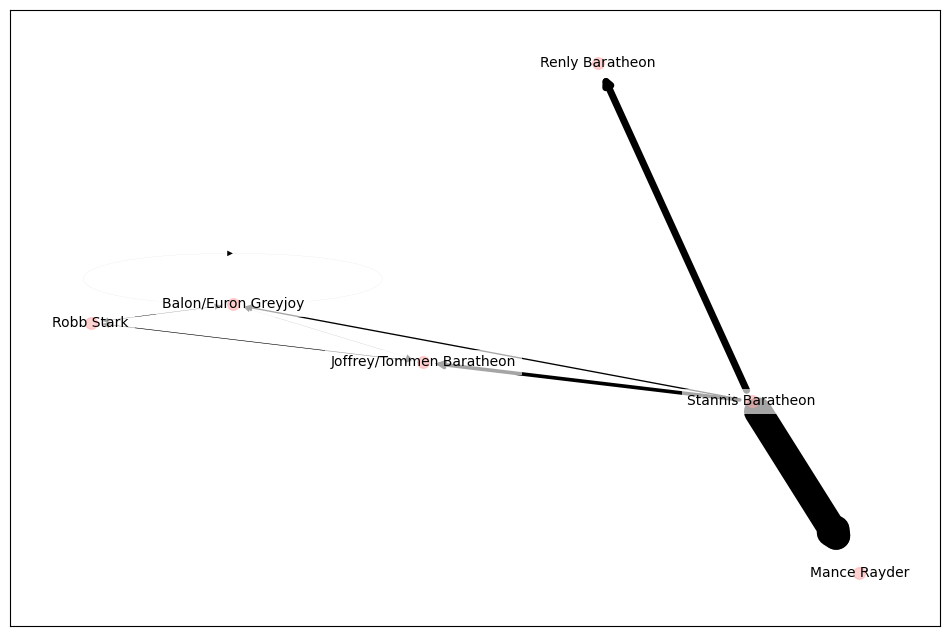

In [306]:
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(weight(battles, G, attacked_counts), seed=42)
edges = weight(battles, G, attacked_counts).edges(data=True)
nx.draw_networkx_nodes(weight(battles, G, attacked_counts), pos, node_size=70, node_color='Red', alpha=0.5)
nx.draw_networkx_edges(weight(battles, G, attacked_counts), pos, edgelist=edges, width=[data['weight']*0.01 for _, _, data in edges])
nx.draw_networkx_labels(weight(battles, G, attacked_counts), pos, font_size=10, bbox=dict(facecolor='white', edgecolor='none', alpha=0.65))
plt.show()

In [307]:
edges_with_attrs


[('Joffrey/Tommen Baratheon',
  'Robb Stark',
  {'weight': 41.0,
   'attacker_commander': 'Jonos Bracken, Jaime Lannister',
   'defender_commander': 'Tytos Blackwood',
   'outcome': 'win',
   'location': ('Raventree', 'The Riverlands'),
   'year': 300,
   'attacked_counts': 10,
   'commander': ('Jonos Bracken, Jaime Lannister', 'Tytos Blackwood'),
   'name of war': 'Siege of Raventree'}),
 ('Joffrey/Tommen Baratheon',
  'Balon/Euron Greyjoy',
  {'weight': 2.0,
   'attacker_commander': 'Ramsey Bolton',
   'defender_commander': nan,
   'outcome': 'win',
   'location': ('Moat Cailin', 'The North'),
   'year': 300,
   'attacked_counts': 1,
   'commander': ('Ramsey Bolton', nan),
   'name of war': 'Fall of Moat Cailin'}),
 ('Joffrey/Tommen Baratheon',
  'Stannis Baratheon',
  {'weight': 43.0,
   'attacker_commander': 'Loras Tyrell, Raxter Redwyne',
   'defender_commander': 'Rolland Storm',
   'outcome': 'win',
   'location': ('Dragonstone', 'The Stormlands'),
   'year': 300,
   'attacked_co

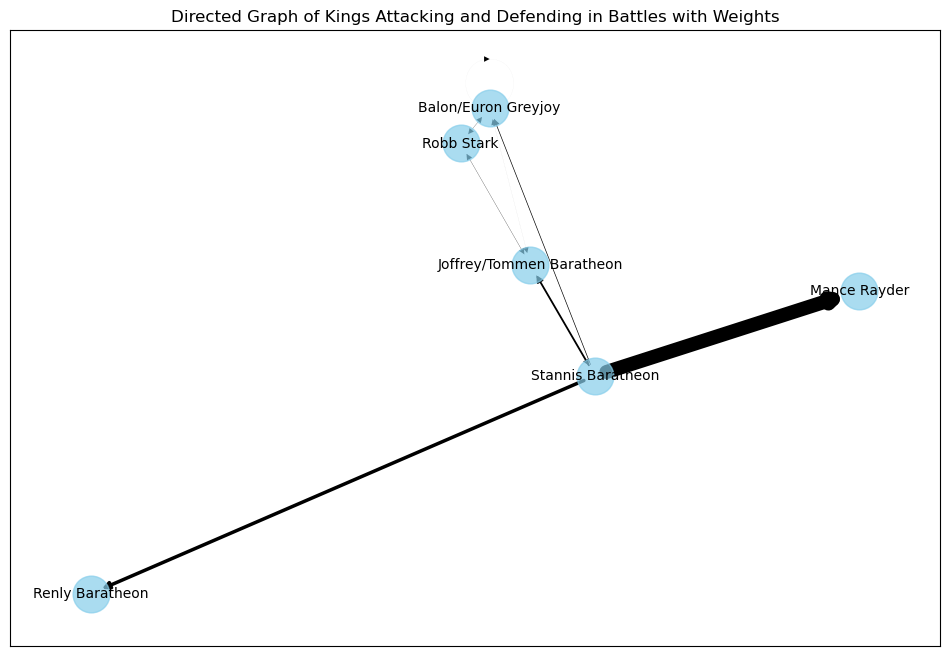

[('Joffrey/Tommen Baratheon',
  'Robb Stark',
  {'weight': 16.0,
   'attacker_commander': 'Jonos Bracken, Jaime Lannister',
   'defender_commander': 'Tytos Blackwood',
   'outcome': 'win',
   'location': 'Raventree',
   'year': 300}),
 ('Joffrey/Tommen Baratheon',
  'Balon/Euron Greyjoy',
  {'weight': 1.0,
   'attacker_commander': 'Ramsey Bolton',
   'defender_commander': nan,
   'outcome': 'win',
   'location': 'Moat Cailin',
   'year': 300}),
 ('Joffrey/Tommen Baratheon',
  'Stannis Baratheon',
  {'weight': 21.0,
   'attacker_commander': 'Loras Tyrell, Raxter Redwyne',
   'defender_commander': 'Rolland Storm',
   'outcome': 'win',
   'location': 'Dragonstone',
   'year': 300}),
 ('Stannis Baratheon',
  'Renly Baratheon',
  {'weight': 252.0,
   'attacker_commander': 'Stannis Baratheon, Davos Seaworth',
   'defender_commander': 'Renly Baratheon, Cortnay Penrose, Loras Tyrell, Randyll Tarly, Mathis Rowan',
   'outcome': 'win',
   'location': "Storm's End",
   'year': 299}),
 ('Stannis B

In [265]:
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd

# Load the battles dataset
battles = pd.read_csv('./battles.csv')

# Fill missing values
battles['attacker_king'].fillna(battles['attacker_king'].mode()[0], inplace=True)
battles['defender_king'].fillna(battles['defender_king'].mode()[0], inplace=True)

# Function to extract unique kings
def kings(data):
    kings_set = set(data.attacker_king).union(set(data.defender_king))
    return list(kings_set)

# Create a directed graph
G = nx.DiGraph()
G.add_nodes_from(kings(battles))

# Add edges with weights and additional attributes
for _, row in battles.iterrows():
    attacker = row.attacker_king
    defender = row.defender_king
    weight_edge = 0
    
    # Add weight based on major_death
    if not pd.isna(row.major_death):
        weight_edge += row.major_death
    
    # Add weight based on army sizes
    if not pd.isna(row.attacker_size):
        weight_edge += (row.attacker_size) * 0.01  # scale down for visualization purposes
    if not pd.isna(row.defender_size):
        weight_edge += (row.defender_size) * 0.01  # scale down for visualization purposes
    
    # Add weight based on victory status (1 if attacker won, else 0)
    if not pd.isna(row.attacker_outcome) and row.attacker_outcome == 'win':
        weight_edge += 1
    
    # Add the edge with weight and other attributes
    G.add_edge(attacker, defender, weight=weight_edge, 
               attacker_commander=row.get('attacker_commander', 'Unknown'), 
               defender_commander=row.get('defender_commander', 'Unknown'),
               outcome=row.get('attacker_outcome', 'Unknown'),
               location=row.get('location', 'Unknown'),
               year=row.get('year', 'Unknown'))

# Draw the graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)  # fixed positions for reproducibility

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_size=700, node_color='skyblue', alpha=0.7)

# Draw edges with weights
edges_data = G.edges(data=True)
nx.draw_networkx_edges(G, pos, edgelist=edges_data, edge_color='black', width=[data['weight'] * 0.01 for _, _, data in edges_data])

# Draw labels
nx.draw_networkx_labels(G, pos, font_size=10, font_family='sans-serif')

plt.title('Directed Graph of Kings Attacking and Defending in Battles with Weights')
plt.show()

# Optionally, inspect the edges with their attributes
edges_with_attrs = [(u, v, d) for u, v, d in G.edges(data=True)]
edges_with_attrs[:5]  # Display the first 5 edges with attributes